In [64]:
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# importing statsmodels library to fit lowess curve through data
import statsmodels.api as sm
import datetime
 
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle 


In [65]:
df= pd.read_excel(r'feature_engineering_V5.xlsx')

In [66]:
df.isna().sum()

File_Name                 0
Car_Name                  0
Model_Year                0
Price                     0
Car_Color                 0
Fuel_Type                 0
Car_Origin                0
Driving_License           0
Lime_Type                 0
Glass_Type                0
Motor_Power               0
Passenger_Number        778
Payment_Method            0
Shown_Status              0
Extras                    0
Age                       0
Car_Speedometer1       2183
New_Previous_Owners       0
New_Column_carName        0
dtype: int64

In [67]:
mean_previous_owners = df['New_Previous_Owners'].mean()
df['New_Previous_Owners'].fillna(mean_previous_owners, inplace=True)

In [68]:
df.head(2)

,File_Name,Car_Name,Model_Year,Price,Car_Color,Fuel_Type,Car_Origin,Driving_License,Lime_Type,Glass_Type,Motor_Power,Passenger_Number,Payment_Method,Shown_Status,Extras,Age,Car_Speedometer1,New_Previous_Owners,New_Column_carName
0,500118.txt,كيا اوبتيما,2014,100000,white,petrol,private,Palestinian,Automatic,electronic,2000,4,cash,For_sale,sunroof,9,75000.0,1,كيا
1,500163.txt,كيا سورينتو,2007,60000,Grey,diesel,private,Palestinian,Semi automatic,electronic,2500,7,Installment,Sell_or_exchange,sunroof,16,130000.0,2,كيا


In [69]:
mean_value = df['Car_Speedometer1'].mean()
mean_value

82201.54533219397

In [70]:
df['Car_Speedometer1'].fillna(int(mean_value), inplace=True)         #           هلالي   رام    ركاب

In [71]:
texts_to_remove = ['+','1998','2000','4800','2013','مع باب خلفي','2007','كوووورسا بسعر ممتاز','2016','- مع بانوراما وبصمه وشاشة - كاميرا',
             '2016','٢٠١٦','2011','تنك مياه','١٩٩٩','diesel privat','Compass','2012','فل اضافات','x1','اصل الماني  بانوراما بصمه شاشه كاميرا',
                  '١٢١٨','١١١٧','٢٠١٦','2017','1999','١٩٩٨','٢٠٠٦','2006','1988','1997','سكودا كودياك  Xdrive  X3..28i',
                  '2001','اكسنت كوري بصمه','تعديل ار','1999','2005','٢٠١٥','2004','1985','2008','2014','2003','1993','2009',
                  'd','٢٠١٥','٢٠١٠','2019','2010','١٩٨٣','٢٠١٩','1990','٢٠٠٣','connect','2018','2015','1983','2000','1983',
                  '٢٠١٢','2006','2/4','ابواب 6']

for text in texts_to_remove:
    df['Car_Name'] = df['Car_Name'].str.replace(text, '')

df['Car_Name'] = df['Car_Name'].str.strip()

C:\Users\Alaa_Abdallah\AppData\Local\Temp\ipykernel_16540\613112373.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Car_Name'] = df['Car_Name'].str.replace(text, '')
C:\Users\Alaa_Abdallah\AppData\Local\Temp\ipykernel_16540\613112373.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Car_Name'] = df['Car_Name'].str.replace(text, '')


In [72]:
df['Passenger_Number'].unique()

array(['4', '7', nan, '5', '4+1', '8', '6', '7,+ 1', '7:1', '1+7', '1+4',
       '2', '6+1', '6±1', '22', '1', '5+1', '5+2', 'مثال: 4 + 1', '7.1',
       '7 =1', '7+1', '1+2', '6x1', '2/1', '8+1', '4+2', '104', '4\\1',
       '000', '3', 'اكثر من 10', '9'], dtype=object)

In [73]:
texts_to_remove = [ ]

for text in texts_to_remove:
    df['Car_Name'] = df['Car_Name'].str.replace(text, '')

df['Car_Name'] = df['Car_Name'].str.strip()

In [74]:
df['Passenger_Number'] = df['Passenger_Number'].str.strip()
df['Passenger_Number'].replace({
    '000':'0',
     '4+1':'5',
    '7,+ 1':'8',
    '1+7':'8',
    '1+4':'5',
    '6+1':'7',
    '6±1':'7',
    '5+1':'6',
    '5+2':'7',
    '7.1':'8',
    'مثال: 4 + 1':'5',
    '7 =1':'8',
    '7+1':'8',
    '1+2':'3',
    '6x1':'7',
    '2/1':'5',
    '8+1':'9',
    '4+2':'6',
    '104':'5',
    '4\\1':'5',
    '7:1':'8',
    'اكثر من 10':'5',          }, inplace=True)

In [75]:
df['Passenger_Number'] = pd.to_numeric(df['Passenger_Number'], errors='coerce')

mean_value = df['Passenger_Number'].mean()
df['Passenger_Number'].fillna(mean_value, inplace=True)

df['Passenger_Number'] = df['Passenger_Number'].astype(int)

In [76]:
mean_value = df['Passenger_Number'].mean()
int(mean_value)

4

In [77]:
df['Passenger_Number'].fillna(int(mean_value), inplace=True)

In [78]:
df['Passenger_Number'] = pd.to_numeric(df['Passenger_Number'], errors='coerce').astype(int)

In [79]:
df['Passenger_Number'].unique()

array([ 4,  7,  5,  8,  6,  2, 22,  1,  3,  9,  0])

In [80]:
df.to_excel('feature_engineering_V6.xlsx', index=False)

In [81]:
df.head(2)

,File_Name,Car_Name,Model_Year,Price,Car_Color,Fuel_Type,Car_Origin,Driving_License,Lime_Type,Glass_Type,Motor_Power,Passenger_Number,Payment_Method,Shown_Status,Extras,Age,Car_Speedometer1,New_Previous_Owners,New_Column_carName
0,500118.txt,كيا اوبتيما,2014,100000,white,petrol,private,Palestinian,Automatic,electronic,2000,4,cash,For_sale,sunroof,9,75000.0,1,كيا
1,500163.txt,كيا سورينتو,2007,60000,Grey,diesel,private,Palestinian,Semi automatic,electronic,2500,7,Installment,Sell_or_exchange,sunroof,16,130000.0,2,كيا


In [82]:
 df.Car_Color.value_counts() 

white             2117
Grey              2035
black              950
blue               430
red                388
navy blue          214
green              161
yellow             160
brown              125
petroleum          106
beige               72
several colors      55
orange              35
purple              16
Name: Car_Color, dtype: int64

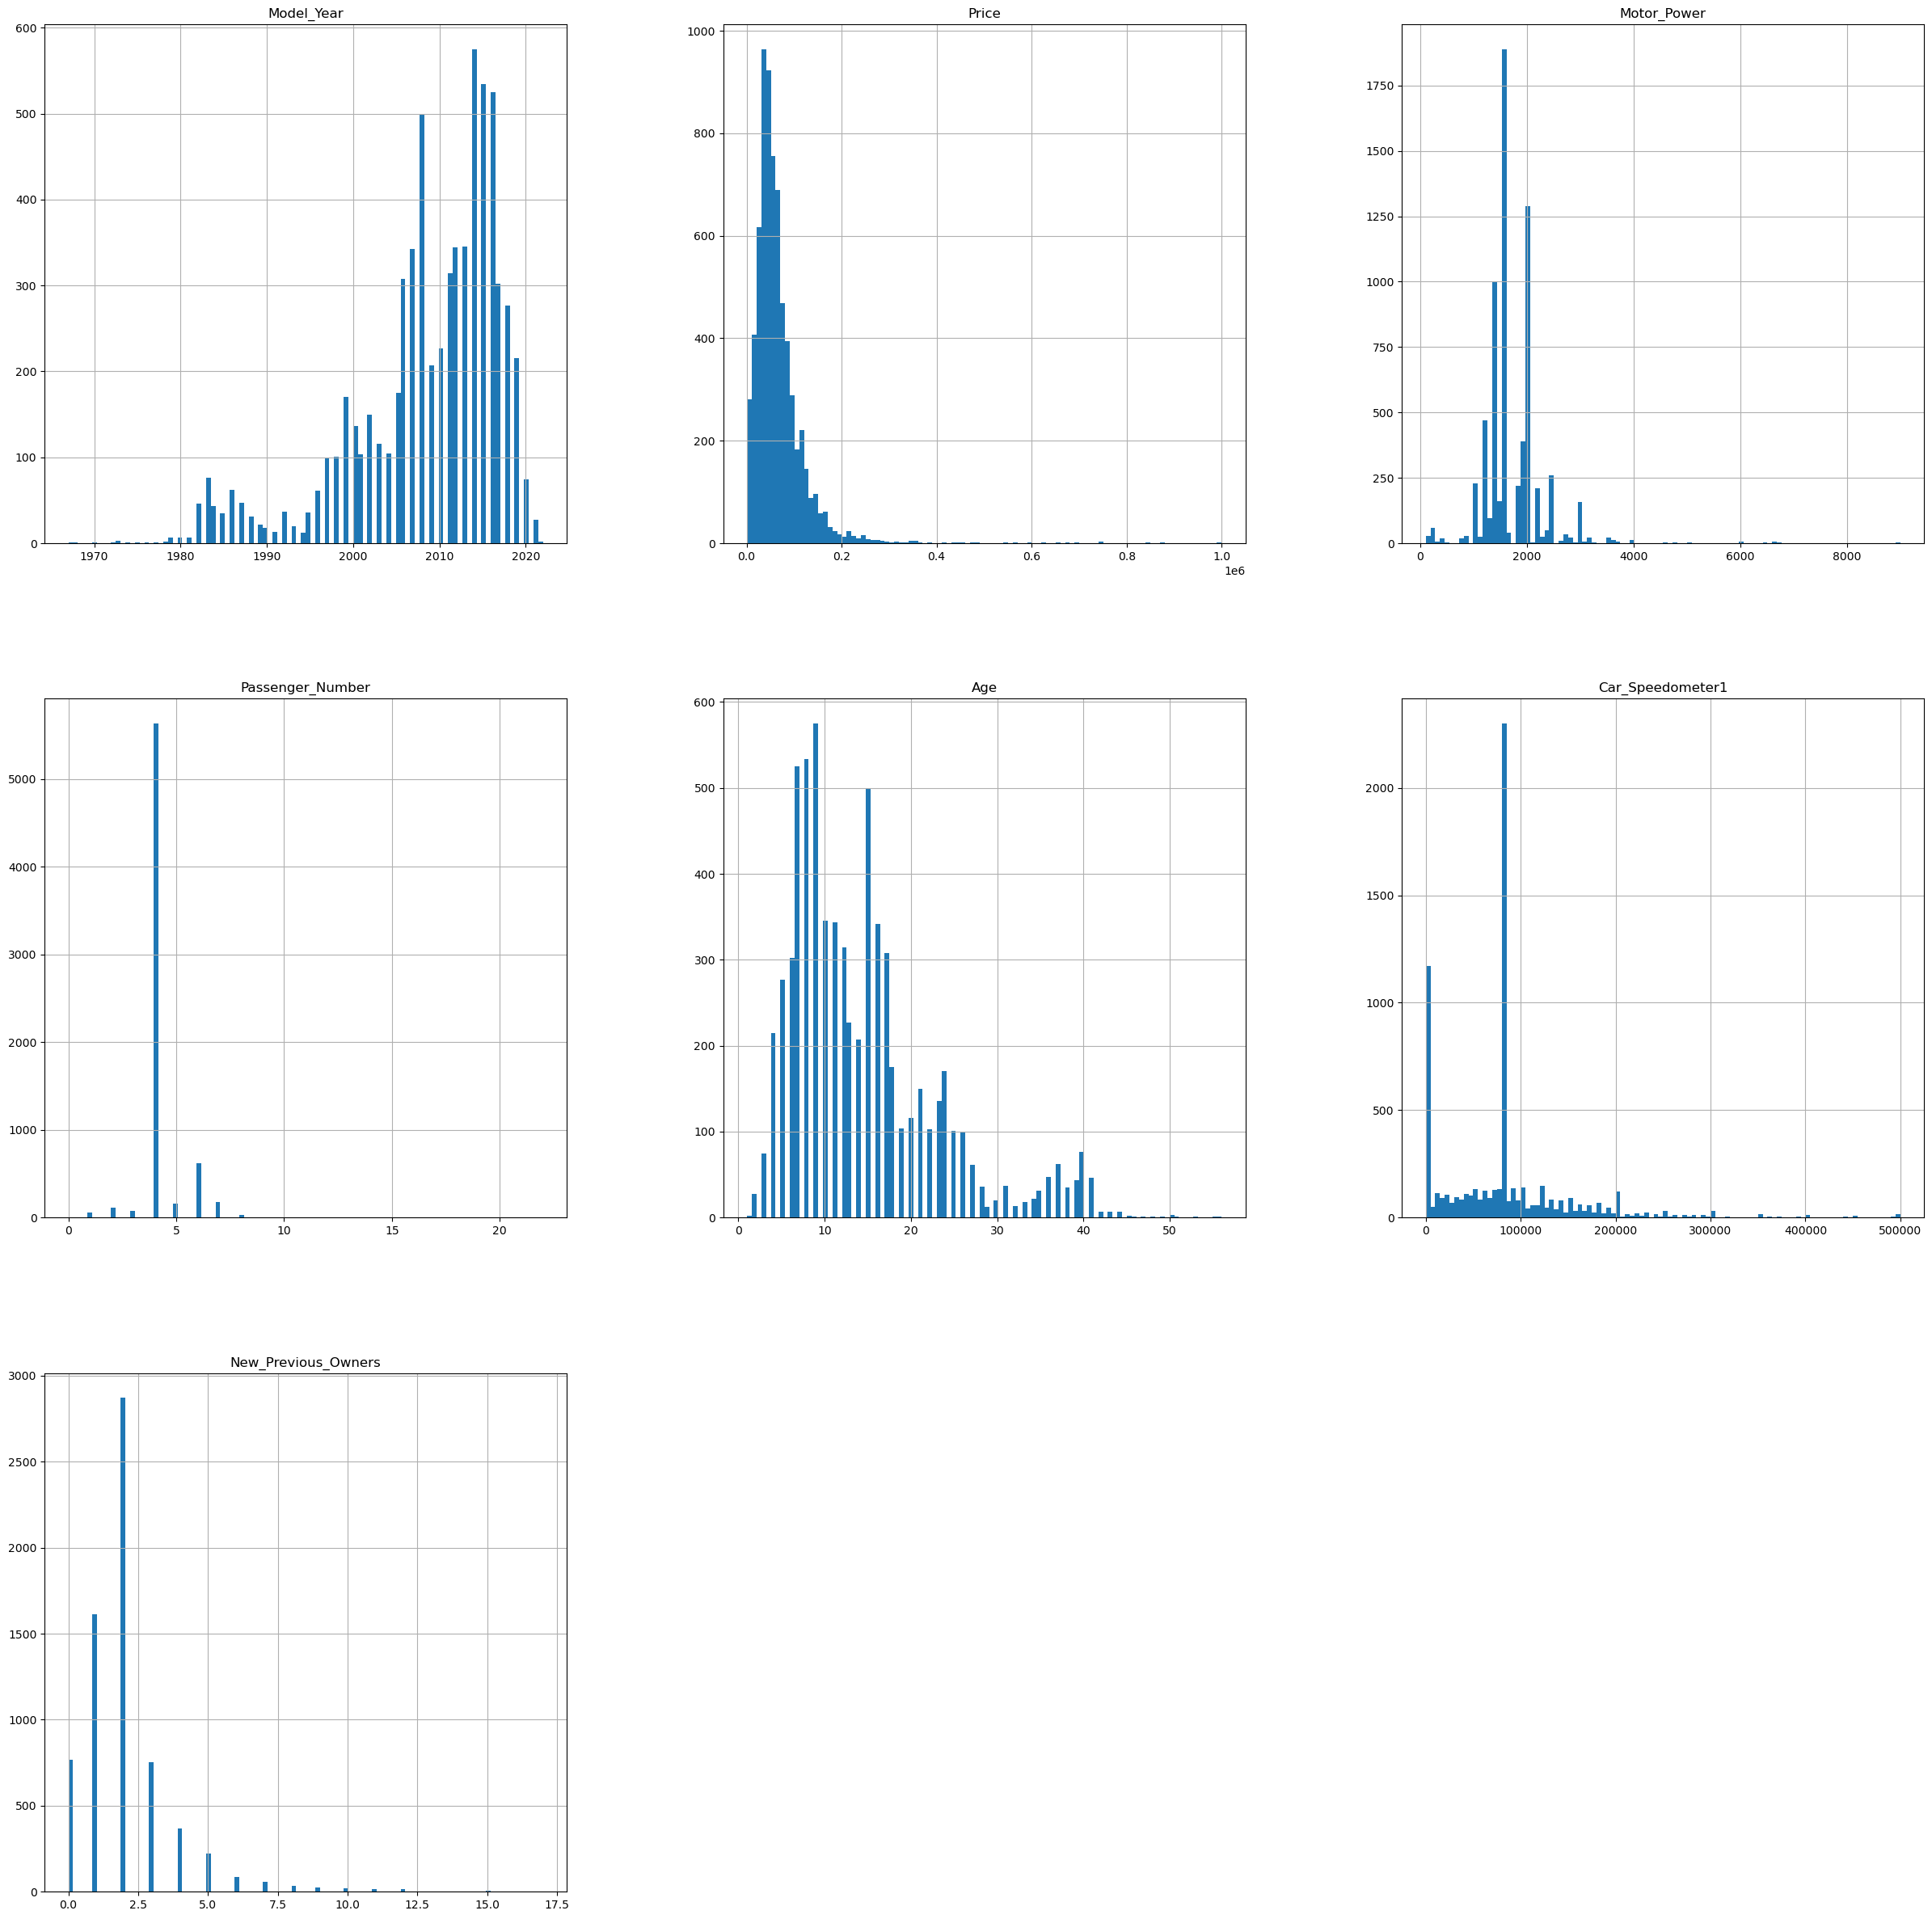

In [83]:
import matplotlib.pyplot as plt  # Import the pyplot module from Matplotlib
df.hist(bins=100,figsize=(30,30))
plt.show() 

In [85]:
#nooooooooooo
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Car_Color_Label'] = le.fit_transform(df['Car_Color'])

In [86]:
df['New_Column_carName'].value_counts()

فولكسفاجن                1160
هونداي                   1046
كيا                       827
سكودا                     770
اوبل                      493
مرسيدس                    367
بيجو                      330
سيت                       261
فورد                      233
بي ام دبليو               219
فيات                      149
ستروين                     99
ميتسوبيشي                  95
شفروليه                    88
دايو                       84
اودي                       84
سوبارو                     83
رينو                       63
نيسان                      47
تويوتا                     45
هوندا                      44
دراجة نارية                43
مازدا                      37
جييب                       34
فولفو                      26
أفيكو                      26
روفر                       20
ايسوزو                     19
داف                        16
سانغ يونغ                  15
داتشيا                     11
شاحنة                       8
جي ام سي                    5
باص       

In [87]:
# Assigning unique labels to each brand
df['Brand_Unique_Label'] = pd.factorize(df['New_Column_carName'])[0]

In [88]:
# Binary encoding
df['Sunroof_Presence'] = (df['Extras'] == 'sunroof').astype(int)

In [89]:
df.isna().sum()

File_Name              0
Car_Name               0
Model_Year             0
Price                  0
Car_Color              0
Fuel_Type              0
Car_Origin             0
Driving_License        0
Lime_Type              0
Glass_Type             0
Motor_Power            0
Passenger_Number       0
Payment_Method         0
Shown_Status           0
Extras                 0
Age                    0
Car_Speedometer1       0
New_Previous_Owners    0
New_Column_carName     0
Car_Color_Label        0
Brand_Unique_Label     0
Sunroof_Presence       0
dtype: int64

In [90]:
df.Car_Color.value_counts() 

white             2117
Grey              2035
black              950
blue               430
red                388
navy blue          214
green              161
yellow             160
brown              125
petroleum          106
beige               72
several colors      55
orange              35
purple              16
Name: Car_Color, dtype: int64

In [91]:
df.head(2)

,File_Name,Car_Name,Model_Year,Price,Car_Color,Fuel_Type,Car_Origin,Driving_License,Lime_Type,Glass_Type,...,Payment_Method,Shown_Status,Extras,Age,Car_Speedometer1,New_Previous_Owners,New_Column_carName,Car_Color_Label,Brand_Unique_Label,Sunroof_Presence
0,500118.txt,كيا اوبتيما,2014,100000,white,petrol,private,Palestinian,Automatic,electronic,...,cash,For_sale,sunroof,9,75000.0,1,كيا,12,0,1
1,500163.txt,كيا سورينتو,2007,60000,Grey,diesel,private,Palestinian,Semi automatic,electronic,...,Installment,Sell_or_exchange,sunroof,16,130000.0,2,كيا,0,0,1


In [92]:
df.Payment_Method.value_counts()

cash           4323
Installment    2541
Name: Payment_Method, dtype: int64

In [93]:
df_encoded = pd.get_dummies(df, columns=['Payment_Method'], prefix='Payment')

In [94]:
df = df[df['Fuel_Type'] != 'electricity']

In [95]:
df.Glass_Type.value_counts()         

electronic    6337
Manual         526
Name: Glass_Type, dtype: int64

In [96]:
# Create dummy variables for the 'Fuel_Type' column
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], prefix='Fuel')

In [97]:
# Create dummy variables for the 'Car_Origin' column
df_encoded = pd.get_dummies(df, columns=['Car_Origin'], prefix='CarOrigin')

In [98]:
df = pd.get_dummies(df, columns=['Driving_License'], prefix='DL', drop_first=True)

In [99]:
# One-hot encoding for 'Lime_Type'
df = pd.get_dummies(df, columns=['Lime_Type'], prefix='LT', drop_first=True)

In [100]:
# Assuming your data is in a DataFrame named 'df'
df_encoded = pd.get_dummies(df, columns=['Glass_Type'], prefix='Glass')

In [101]:
df.Shown_Status.value_counts()

For_sale            4208
Sell_or_exchange    2596
To_switch             59
Name: Shown_Status, dtype: int64

In [102]:
# Create dummy variables for the 'Shown_Status' column
df_encoded = pd.get_dummies(df, columns=['Shown_Status'], prefix='Shown')

In [104]:
df.to_excel('feature_engineering_V7.xlsx', index=False)

In [105]:
df.head(2)

,File_Name,Car_Name,Model_Year,Price,Car_Color,Fuel_Type,Car_Origin,Glass_Type,Motor_Power,Passenger_Number,...,Age,Car_Speedometer1,New_Previous_Owners,New_Column_carName,Car_Color_Label,Brand_Unique_Label,Sunroof_Presence,DL_Palestinian,LT_Semi automatic,LT_normal
0,500118.txt,كيا اوبتيما,2014,100000,white,petrol,private,electronic,2000,4,...,9,75000.0,1,كيا,12,0,1,1,0,0
1,500163.txt,كيا سورينتو,2007,60000,Grey,diesel,private,electronic,2500,7,...,16,130000.0,2,كيا,0,0,1,1,1,0


In [39]:
columns_to_drop = ['Car_Color', 'Fuel_Type', 'Car_Origin','Glass_Type','File_Name','Extras']

# Drop specified columns
df = df.drop(columns=columns_to_drop, axis=1)

In [40]:
df = df.drop(columns=['Payment_Method'])

In [41]:
df = df.drop(columns=['Shown_Status'])

In [43]:
df.to_excel('feature_engineering_V8.xlsx', index=False)

In [44]:
df.isna().sum()

Car_Name                0
Model_Year              0
Price                   0
Motor_Power             0
Passenger_Number        0
Age                     0
Car_Speedometer1        0
New_Previous_Owners     0
New_Column_carName      0
Car_Color_Label         0
Brand_Unique_Label      0
Sunroof_Presence        0
Payment_Method_Label    0
Fuel_Type_Label         0
Car_Origin_Label        0
DL_Palestinian          0
LT_Semi automatic       0
LT_normal               0
Glass_Type_Label        0
Shown_Status_Label      0
dtype: int64

In [45]:
df.head(2)

,Car_Name,Model_Year,Price,Motor_Power,Passenger_Number,Age,Car_Speedometer1,New_Previous_Owners,New_Column_carName,Car_Color_Label,Brand_Unique_Label,Sunroof_Presence,Payment_Method_Label,Fuel_Type_Label,Car_Origin_Label,DL_Palestinian,LT_Semi automatic,LT_normal,Glass_Type_Label,Shown_Status_Label
0,كيا اوبتيما,2014,100000,2000,4,9,75000.0,1,كيا,12,0,1,1,1,1,1,0,0,1,1
1,كيا سورينتو,2007,60000,2500,7,16,130000.0,2,كيا,0,0,1,2,2,1,1,1,0,1,2


In [46]:
#modeling :)

In [47]:
df.columns

Index(['Car_Name', 'Model_Year', 'Price', 'Motor_Power', 'Passenger_Number',
       'Age', 'Car_Speedometer1', 'New_Previous_Owners', 'New_Column_carName',
       'Car_Color_Label', 'Brand_Unique_Label', 'Sunroof_Presence',
       'Payment_Method_Label', 'Fuel_Type_Label', 'Car_Origin_Label',
       'DL_Palestinian', 'LT_Semi automatic', 'LT_normal', 'Glass_Type_Label',
       'Shown_Status_Label'],
      dtype='object')

In [48]:
new_df = df[[  'Model_Year', 'Price', 'Motor_Power', 'Passenger_Number',
       'Age', 'Car_Speedometer1', 'New_Previous_Owners', 
       'Car_Color_Label', 'Brand_Unique_Label', 'Sunroof_Presence',
       'Payment_Method_Label', 'Fuel_Type_Label', 'Car_Origin_Label',
       'DL_Palestinian', 'LT_Semi automatic', 'LT_normal', 'Glass_Type_Label',
       'Shown_Status_Label']]
new_df #masking

,Model_Year,Price,Motor_Power,Passenger_Number,Age,Car_Speedometer1,New_Previous_Owners,Car_Color_Label,Brand_Unique_Label,Sunroof_Presence,Payment_Method_Label,Fuel_Type_Label,Car_Origin_Label,DL_Palestinian,LT_Semi automatic,LT_normal,Glass_Type_Label,Shown_Status_Label
0,2014,100000,2000,4,9,75000.0,1,12,0,1,1,1,1,1,0,0,1,1
1,2007,60000,2500,7,16,130000.0,2,0,0,1,2,2,1,1,1,0,1,2
2,2006,43500,1600,4,17,82201.0,2,0,1,0,1,1,1,1,0,0,1,1
3,1982,5500,906,4,41,82201.0,0,1,2,0,2,1,1,1,0,1,2,1
4,2014,54000,1200,4,9,38000.0,2,0,3,0,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,2012,50000,1600,4,11,82201.0,1,12,0,0,1,2,1,1,0,0,1,1
6860,2002,48000,2400,7,21,0.0,5,12,7,0,1,2,2,1,0,1,1,1
6861,2018,87000,1600,4,5,50000.0,0,0,3,0,1,2,1,1,0,1,1,1
6862,2017,126000,2200,6,6,100.0,2,8,0,1,1,2,1,1,0,0,1,1


In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [50]:
Y= new_df['Price']
X= new_df [[  'Model_Year', 'Motor_Power', 'Passenger_Number',
       'Age', 'Car_Speedometer1', 'New_Previous_Owners', 
       'Car_Color_Label', 'Brand_Unique_Label', 'Sunroof_Presence',
       'Payment_Method_Label', 'Fuel_Type_Label', 'Car_Origin_Label',
       'DL_Palestinian', 'LT_Semi automatic', 'LT_normal', 'Glass_Type_Label',
       'Shown_Status_Label']]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4804 entries, 1718 to 5640
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model_Year            4804 non-null   int64  
 1   Motor_Power           4804 non-null   int64  
 2   Passenger_Number      4804 non-null   int32  
 3   Age                   4804 non-null   int64  
 4   Car_Speedometer1      4804 non-null   float64
 5   New_Previous_Owners   4804 non-null   int64  
 6   Car_Color_Label       4804 non-null   int32  
 7   Brand_Unique_Label    4804 non-null   int64  
 8   Sunroof_Presence      4804 non-null   int32  
 9   Payment_Method_Label  4804 non-null   int64  
 10  Fuel_Type_Label       4804 non-null   int64  
 11  Car_Origin_Label      4804 non-null   int64  
 12  DL_Palestinian        4804 non-null   uint8  
 13  LT_Semi automatic     4804 non-null   uint8  
 14  LT_normal             4804 non-null   uint8  
 15  Glass_Type_Label  

In [53]:
standardScaler = StandardScaler()         #X_train, X_test, y_train, y_test
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_predict = model.predict(X_test)

In [56]:
r2_score(y_test, y_predict)

0.32374463403138665

In [57]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.44191197392444137

In [ ]:
#another one

In [58]:
import pandas as pd
import matplotlib.pyplot as plt    #matplotlib=> this is packege must i learn about it 
from scipy import stats    # in statistical analysis scipy is number one
import numpy as np


In [59]:
from sklearn.linear_model import LinearRegression 

In [60]:
lm=LinearRegression()     
x_train=new_df.drop(columns='Price') 
y_train=new_df['Price'] 
lm.fit(x_train,y_train) 

LinearRegression()

In [61]:
#get the coefficients of the model               FROM G.D
["{:.5f}".format(x) for x in lm.coef_]

['1389.01335',
 '17.40396',
 '3034.87728',
 '-1389.01335',
 '-0.00916',
 '-1753.34602',
 '192.15037',
 '783.18788',
 '25813.57354',
 '2067.27211',
 '11448.43889',
 '-3647.37708',
 '45790.51540',
 '3304.97776',
 '-9188.39728',
 '20067.89478',
 '847.55557']

In [62]:
#get the intercept value
lm.intercept_

-2834359.0821621283

In [63]:
# save the model object into files 
import pickle

In [64]:
pickle.dump(lm, open('./modell.sav','wb'))
#sav file -> binary file 

In [65]:
# if you want to load to model from the storage 
loaded_model = pickle.load(open('./modell.sav','rb'))

In [66]:
#use the model to predit
#note the predict function assumes a 2D array where each line is a sample to predict for 
x=np.array([2016,125,1,7,125,0,13,16,1,1,1,1,1,0,0,1,1]).reshape(1,17) # -> 2D use reshape

result= loaded_model.predict(x)
if x.shape[0]==1:
    result=result[0]
print(result)


78794.80358435353


C:\Users\Alaa_Abdallah\anaconda3\New folder\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Create a heatmap
sns.heatmap(new_df, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)

# Show the plot
plt.show()

correlation_matrix = df[['Age', 'Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()